In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [176]:
#read data
fbi_wanted_df = pd.read_csv("fbi_wanted.csv")

In [177]:
#show first rows of dataframe
fbi_wanted_df.head()

,title,description,subject,status,caution,aliaces,reward_text,publication,sex,race,...,height_max,nationality,age_range,weight,dates_of_birth_used,place_of_birth,languages,warning_message,occupations,complexion
0,"JASON WILLIAM DIES - SAN DIEGO, CALIFORNIA","June 18, 1991\r\nSan Diego, California",ViCAP Missing Persons,na,NaN,"William Diaz, Bill Diaz, Bill Dies, William Dies",NaN,2018-08-07T12:35:00,Male,hispanic,...,71.0,NaN,20 years old (at time of disappearance),130 to 160 pounds,1970,NaN,NaN,NaN,NaN,NaN
1,"JENNIFER L. WILSON - DERBY, KANSAS","Missing since September 1, 2002",ViCAP Missing Persons,na,NaN,NaN,NaN,2017-08-24T08:42:00,Female,white,...,69.0,NaN,NaN,110 - 125 pounds,NaN,NaN,NaN,NaN,NaN,NaN
2,"TONITA MICHELLE BROOKS - DURHAM, NORTH CAROLINA","August 26, 2019\r\nDurham, North Carolina",ViCAP Missing Persons,na,NaN,NaN,NaN,2022-09-16T07:14:00,Female,black,...,64.0,NaN,45 years old (at time of last contact),120 pounds,NaN,NaN,NaN,NaN,NaN,NaN
3,"JANE DOE - FREDERICK, MARYLAND","Frederick, Maryland\r\nJuly 31, 1991",ViCAP Unidentified Persons,na,NaN,NaN,NaN,2010-10-26T19:50:00,Female,white,...,62.0,NaN,17 to 25 years old,110 to 120 pounds,NaN,NaN,NaN,NaN,NaN,NaN
4,HATE CRIME,"Unknown Suspect\r\nSt. Louis, Missouri\r\nApri...",Seeking Information,na,NaN,NaN,"The FBI is offering a reward of up to $10,000 ...",2023-11-28T11:52:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SHOULD BE CONSIDERED ARMED AND DANGEROUS,NaN,NaN


In [178]:
#get dataframe shape
fbi_wanted_df.shape

(1024, 21)

In [179]:
#get dataframe info
fbi_wanted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                1024 non-null   object 
 1   description          990 non-null    object 
 2   subject              1015 non-null   object 
 3   status               1024 non-null   object 
 4   caution              434 non-null    object 
 5   aliaces              439 non-null    object 
 6   reward_text          410 non-null    object 
 7   publication          1024 non-null   object 
 8   sex                  826 non-null    object 
 9   race                 748 non-null    object 
 10  hair                 766 non-null    object 
 11  height_max           665 non-null    float64
 12  nationality          411 non-null    object 
 13  age_range            176 non-null    object 
 14  weight               671 non-null    object 
 15  dates_of_birth_used  613 non-null    o

In [180]:
#check duplicates
fbi_wanted_df.duplicated().sum()

0

In [181]:
#check for missing values
fbi_wanted_df.isnull().sum()

title                    0
description             34
subject                  9
status                   0
caution                590
aliaces                585
reward_text            614
publication              0
sex                    198
race                   276
hair                   258
height_max             359
nationality            613
age_range              848
weight                 353
dates_of_birth_used    411
place_of_birth         530
languages              910
warning_message        721
occupations            846
complexion             989
dtype: int64

# Clearn and transform data

In [182]:
#replace NaN to None
fbi_wanted_df = fbi_wanted_df.replace(np.nan, None)

#convert string to date
fbi_wanted_df["publication"] = pd.to_datetime(fbi_wanted_df["publication"])
fbi_wanted_df["publication"] = fbi_wanted_df["publication"].map(lambda x: x.date())

#remove whitespaces
fbi_wanted_df["sex"] = fbi_wanted_df["sex"].apply(lambda x: None if x == "" else x)
fbi_wanted_df["nationality"] = fbi_wanted_df["nationality"].apply(lambda x: None if x == "" else x)

#get reward digits from text
fbi_wanted_df["reward_text"] = fbi_wanted_df["reward_text"].apply(lambda x : str(x).replace(" million", ",000,000") if "million" in str(x) else x)
fbi_wanted_df["reward"] = fbi_wanted_df["reward_text"].apply(lambda x : str(x).split("$")[1].split(" ")[0] if "$" in str(x) and x != None else None )
fbi_wanted_df["reward"] = fbi_wanted_df["reward"].apply(lambda x: int(str(x).replace(",", "").replace(".", "")) if x is not None else x)



In [183]:
#create function to cut age from the string
def cut_age(text):
    age_list = []
    if text is not None:
        text_list = text.split(" ")
        for i in text_list:
            if i.isdigit():
                age_list.append(i)
    
    return age_list

In [184]:
#create age_min and age_max
fbi_wanted_df["age_min"] = fbi_wanted_df["age_range"].apply(lambda x: cut_age(x)[0] if len(cut_age(x))> 0 else None)
fbi_wanted_df["age_max"] = fbi_wanted_df["age_range"].apply(lambda x: cut_age(x)[1] if len(cut_age(x))> 1 else None)

In [185]:
#create function to group criminals
def group_subjects(text):
    group_name = "Other"
    if text is not None:
        if "Unidentified Persons" in text:
            group_name = "Unidentified Persons"
        elif "Counterintelligence" in text:
            group_name = "Counterintelligence"
        elif "Missing Persons" in text:
            group_name = "Missing Persons"
        elif "Terroris" in text:
            group_name = "Terrorism"
        elif "Murders" in text:
            group_name = "Murders"
        elif "Enterprise Investigations" in text:
            group_name = "Enterprise Investigations"
        elif "Cyber's Most Wanted" in text:
            group_name = "Cyber's Most Wanted"
        elif "Seeking Information" in text:
            group_name = "Seeking Information"
        elif "Ten Most Wanted" in text:
            group_name = "Ten Most Wanted"
        elif "Kidnapping" in text:
            group_name = "Kidnapping"
        elif "Sexual Assaults" in text:
            group_name = "Sexual Assaults"
        elif "Human Trafficking" in text:
            group_name = "Human Trafficking"
        elif "White Collar Crimes" in text:
            group_name = "White Collar Crimes"
        elif "Additional Violent Crimes" in text:
            group_name = "Additional Violent Crimes"
        elif "Crimes Against Children" in text:
            group_name = "Crimes Against Children"

    return group_name

In [186]:
#create subject groups
fbi_wanted_df["subject_group"] = fbi_wanted_df["subject"].apply(lambda x: group_subjects(x))

In [187]:
fbi_wanted_df.head()

,title,description,subject,status,caution,aliaces,reward_text,publication,sex,race,...,dates_of_birth_used,place_of_birth,languages,warning_message,occupations,complexion,reward,age_min,age_max,subject_group
0,"JASON WILLIAM DIES - SAN DIEGO, CALIFORNIA","June 18, 1991\r\nSan Diego, California",ViCAP Missing Persons,na,None,"William Diaz, Bill Diaz, Bill Dies, William Dies",None,2018-08-07,Male,hispanic,...,1970,None,None,None,None,None,NaN,20,None,Missing Persons
1,"JENNIFER L. WILSON - DERBY, KANSAS","Missing since September 1, 2002",ViCAP Missing Persons,na,None,None,None,2017-08-24,Female,white,...,None,None,None,None,None,None,NaN,None,None,Missing Persons
2,"TONITA MICHELLE BROOKS - DURHAM, NORTH CAROLINA","August 26, 2019\r\nDurham, North Carolina",ViCAP Missing Persons,na,None,None,None,2022-09-16,Female,black,...,None,None,None,None,None,None,NaN,45,None,Missing Persons
3,"JANE DOE - FREDERICK, MARYLAND","Frederick, Maryland\r\nJuly 31, 1991",ViCAP Unidentified Persons,na,None,None,None,2010-10-26,Female,white,...,None,None,None,None,None,None,NaN,17,25,Unidentified Persons
4,HATE CRIME,"Unknown Suspect\r\nSt. Louis, Missouri\r\nApri...",Seeking Information,na,None,None,"The FBI is offering a reward of up to $10,000 ...",2023-11-28,None,None,...,None,None,None,SHOULD BE CONSIDERED ARMED AND DANGEROUS,None,None,10000.0,None,None,Seeking Information


# Analysis

## Count of items in each subject group

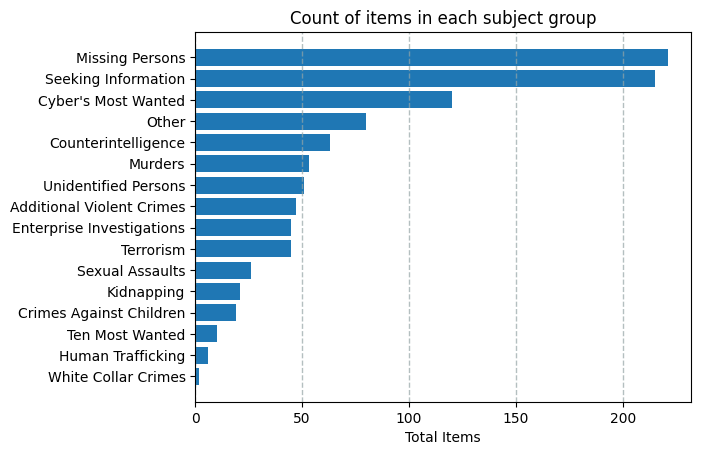

In [188]:
#create plot
fig, ax = plt.subplots()

#prepare data
data = fbi_wanted_df.groupby("subject_group").count()["title"].sort_values(ascending=False)

x = data.index
y = data.values

#create barchart
ax.barh(x, y)
ax.invert_yaxis()
plt.title("Count of items in each subject group")
plt.xlabel('Total Items')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='x', alpha=0.7)
plt.show()

## Total Status Items

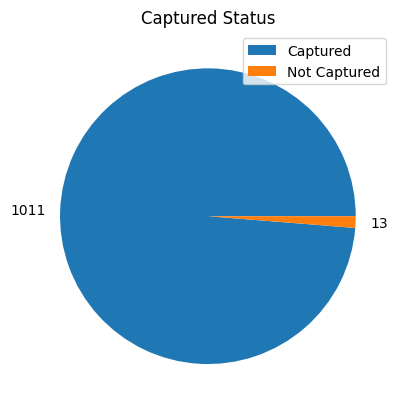

In [189]:
#create plot
fig, ax = plt.subplots()

#prepare data
data = fbi_wanted_df.groupby("status").count()["title"].sort_values(ascending=False)

#create pie chart
ax.pie(data.values, labels=data.values)
ax.set_title("Captured Status")
ax.legend(["Captured" if i.lower() == "na" else "Not Captured" for i in data.index])
plt.show()

## Nationalities associated with individuals on the Cyber's Most Wanted group

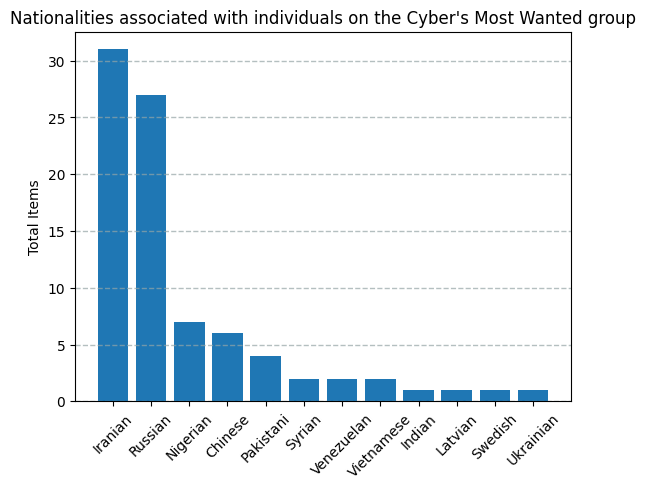

In [198]:
#create plot
fig, ax = plt.subplots()

#prepare data
data = fbi_wanted_df.loc[fbi_wanted_df["subject_group"] == "Cyber's Most Wanted"].groupby("nationality").count()["title"].sort_values(ascending=False)

x = [str(i) for i in data.index]
y = data.values

#create barchart
ax.bar(x, y)
plt.title("Nationalities associated with individuals on the Cyber's Most Wanted group")
plt.ylabel('Total Items')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

## Nationalities associated with individuals on the most wanted Enterprise Investigations

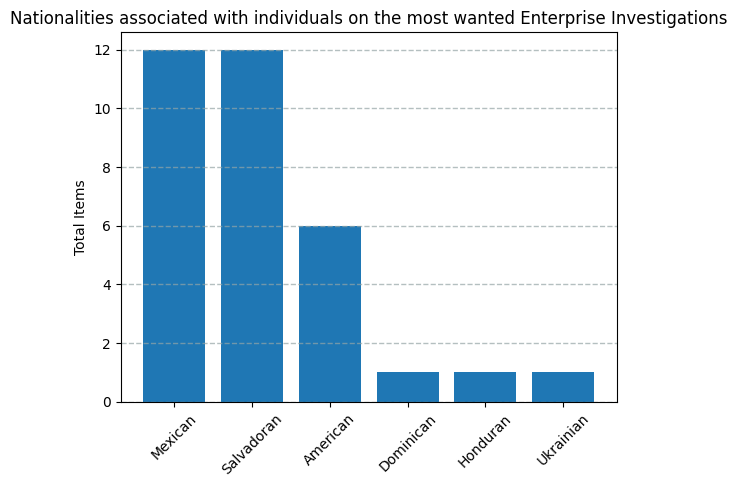

In [191]:
#create plot
fig, ax = plt.subplots()

#prepare data
data = fbi_wanted_df.loc[fbi_wanted_df["subject_group"] == "Enterprise Investigations"].groupby("nationality").count()["title"].sort_values(ascending=False)

x = [str(i) for i in data.index]
y = data.values

#create barchart
ax.bar(x, y)
plt.title("Nationalities associated with individuals on the most wanted Enterprise Investigations")
plt.ylabel('Total Items')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

## Nationalities associated with individuals on the Counterintelligence group

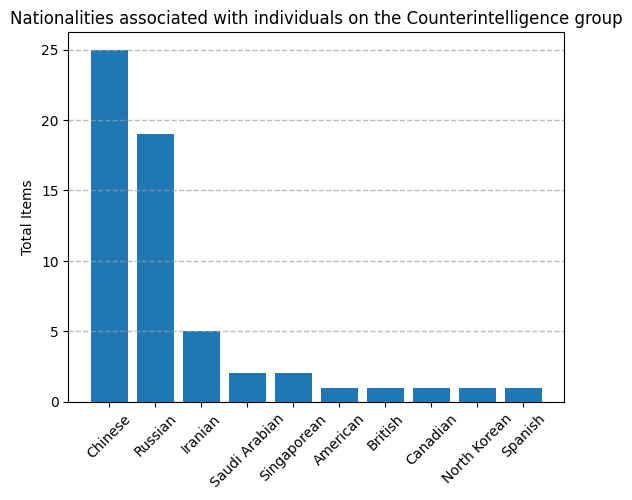

In [199]:
#create plot
fig, ax = plt.subplots()

#prepare data
data = fbi_wanted_df.loc[fbi_wanted_df["subject_group"] == "Counterintelligence"].groupby("nationality").count()["title"].sort_values(ascending=False)

x = [str(i) for i in data.index]
y = data.values

#create barchart
ax.bar(x, y)
plt.title("Nationalities associated with individuals on the Counterintelligence group")
plt.ylabel('Total Items')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

## Nationalities associated with individuals on the most wanted Terrorists

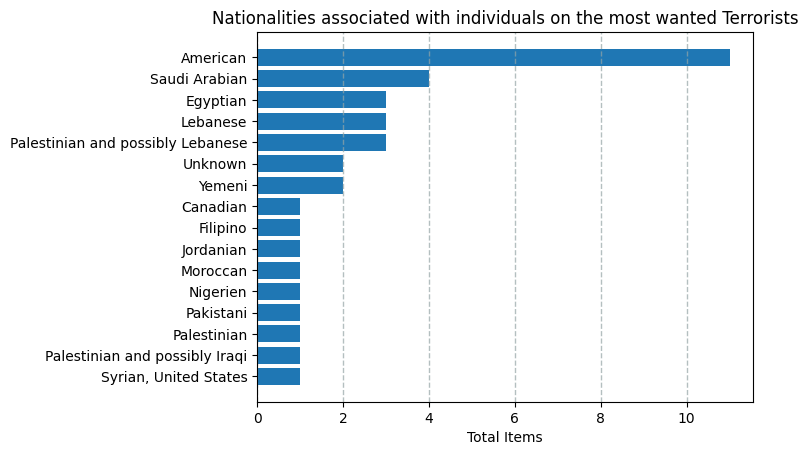

In [193]:
#create plot
fig, ax = plt.subplots()

#prepare data
data = fbi_wanted_df.loc[fbi_wanted_df["subject_group"] == "Terrorism"].groupby("nationality").count()["title"].sort_values(ascending=False)

x = [str(i) for i in data.index]
y = data.values

#create barchart
ax.barh(x, y)
ax.invert_yaxis()
plt.title("Nationalities associated with individuals on the most wanted Terrorists")
plt.xlabel('Total Items')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='x', alpha=0.7)
plt.show()

## Most wanted Murders

/var/folders/3v/k273lppj4n34q0jsbxg6z13m0000gn/T/ipykernel_18383/775575348.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,0].set_xticklabels(nationality_data.index, rotation=45)


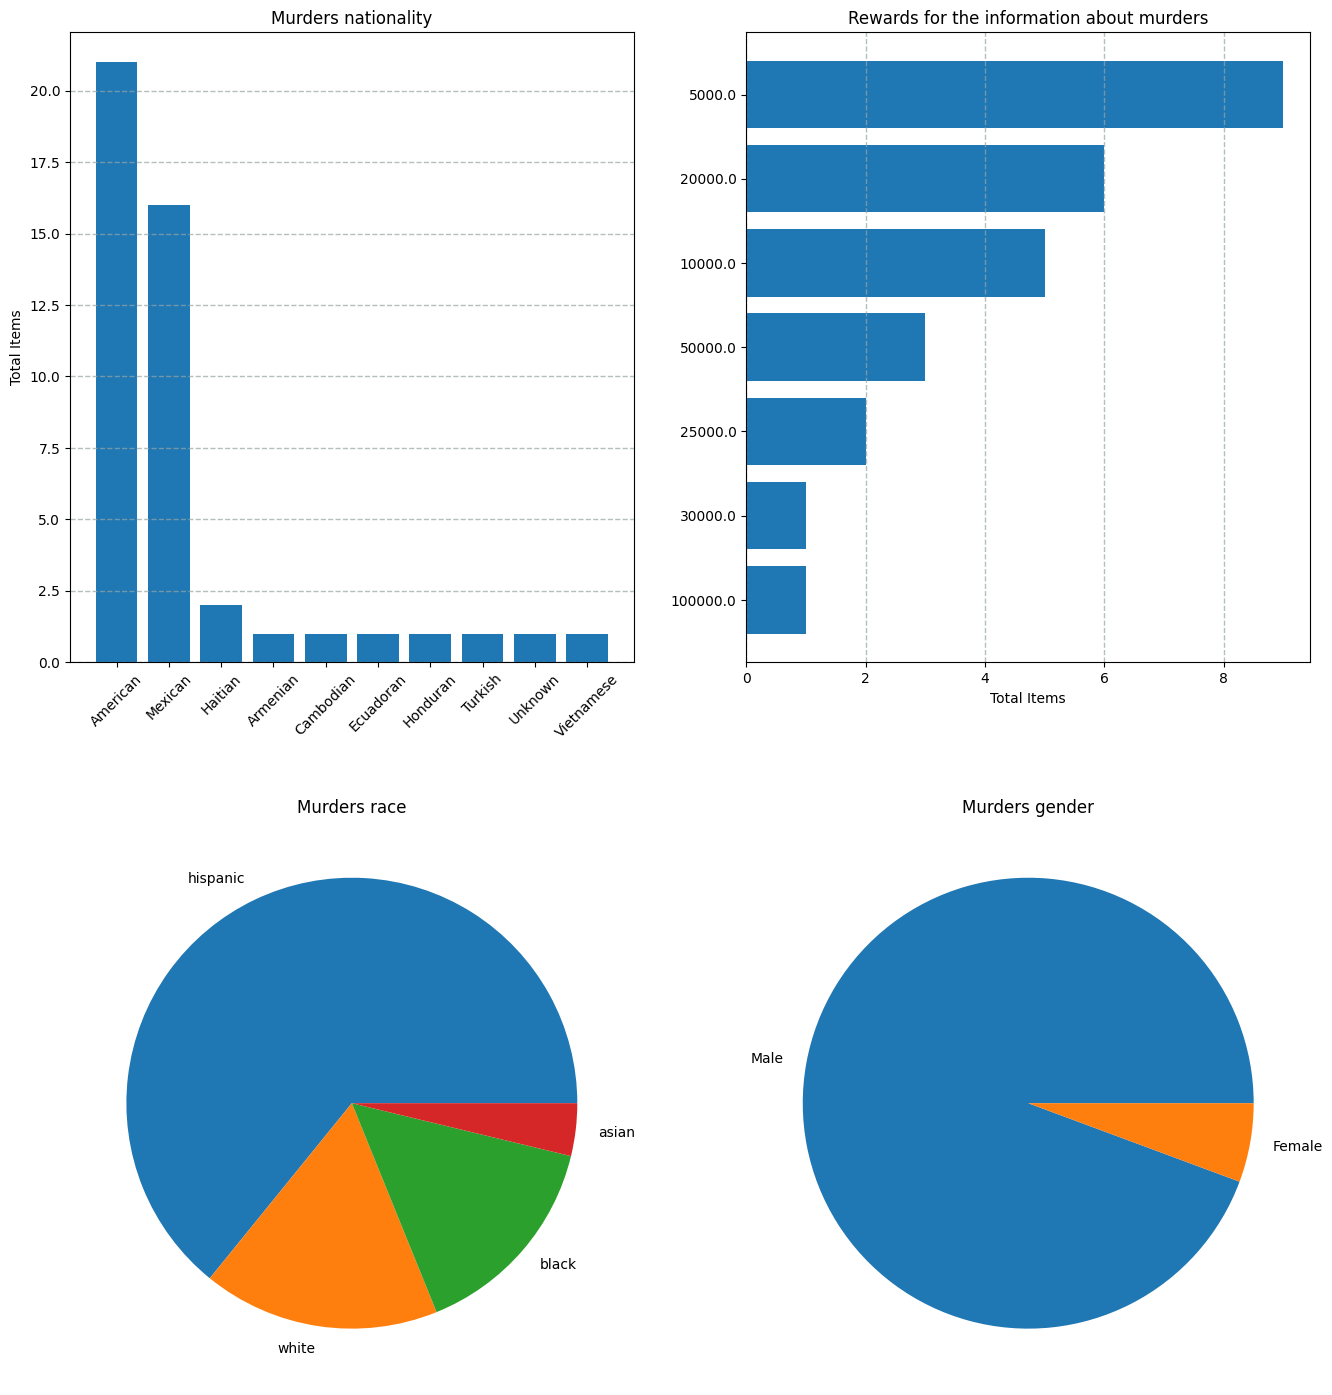

In [194]:
fig, ax = plt.subplots(2, 2, figsize = (16,18))

#prepare data
nationality_data = fbi_wanted_df.loc[fbi_wanted_df["subject_group"] == "Murders"].groupby("nationality").count()["title"].sort_values(ascending=False)
race_data = fbi_wanted_df.loc[fbi_wanted_df["subject_group"] == "Murders"].groupby("race").count()["title"].sort_values(ascending=False)
gender_data = fbi_wanted_df.loc[fbi_wanted_df["subject_group"] == "Murders"].groupby("sex").count()["title"].sort_values(ascending=False)
reward_data = fbi_wanted_df.loc[fbi_wanted_df["subject_group"] == "Murders"].groupby("reward").count()["title"].sort_values(ascending=False)

#create nationality murders bar chart
ax[0,0].bar(nationality_data.index, nationality_data.values)
ax[0,0].set_title("Murders nationality")
ax[0,0].grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
ax[0,0].set_ylabel("Total Items")
ax[0,0].set_xticklabels(nationality_data.index, rotation=45)

#rewards murders bar chart
ax[0,1].barh([str(i) for i in reward_data.index], reward_data.values)
ax[0,1].set_title("Rewards for the information about murders")
ax[0,1].grid(color='#95a5a6', linestyle='--', linewidth=1, axis='x', alpha=0.7)
ax[0,1].set_yticks([str(i) for i in reward_data.index])
ax[0,1].invert_yaxis() 
ax[0,1].set_xlabel("Total Items")

#create race murders bar chart
ax[1,0].pie(race_data.values, labels=race_data.index)
ax[1,0].set_title("Murders race")
ax[1,0].grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)

#race gender murders bar chart
ax[1,1].pie(gender_data.values, labels = gender_data.index)
ax[1,1].set_title("Murders gender")
ax[1,1].grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)

plt.show()

## Aggregate rewards offered by the FBI

/var/folders/3v/k273lppj4n34q0jsbxg6z13m0000gn/T/ipykernel_18383/2974016386.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=90)


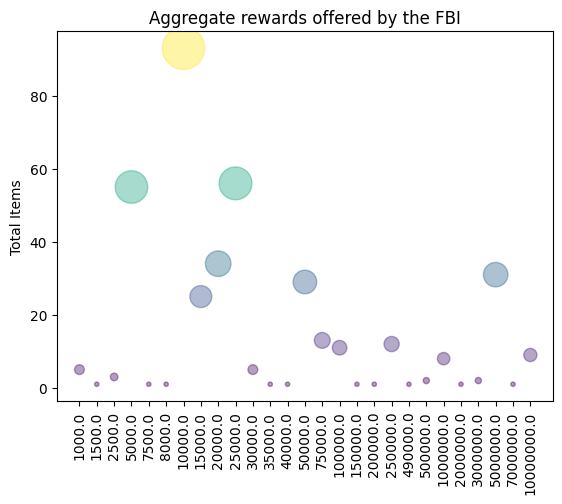

In [195]:
#create plot
fig, ax = plt.subplots()

#prepare data
data = fbi_wanted_df.groupby("reward").count()["title"]

x = [str(i) for i in data.index]
y = data.values

#create scatter
ax.scatter(x, y, c =y, s=y*10, alpha=0.4)
ax.set_xticklabels(x, rotation=90)
plt.title("Aggregate rewards offered by the FBI")
plt.ylabel('Total Items')
plt.show()

## Millions dollars rewards groups (rewards > $1 000 000)

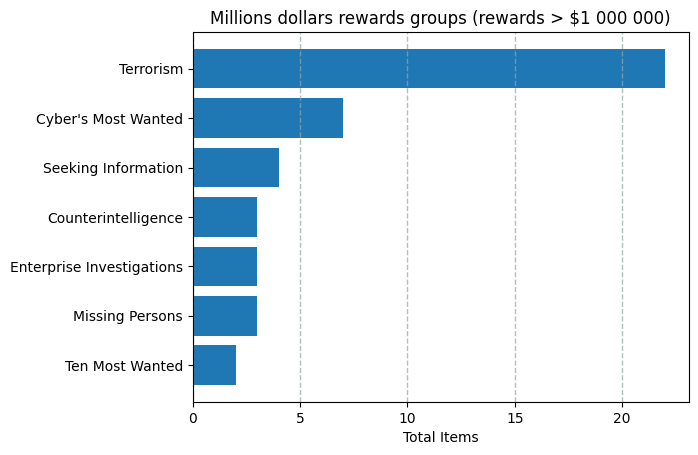

In [196]:
#create plot
fig, ax = plt.subplots()

#prepare data
data = fbi_wanted_df.loc[fbi_wanted_df["reward"] > 1000000].groupby("subject_group").count()["title"].sort_values(ascending=False)

x = [str(i) for i in data.index]
y = data.values

#create horizontal barchart
ax.barh(x, y)
ax.invert_yaxis()
plt.title("Millions dollars rewards groups (rewards > $1 000 000)")
plt.xlabel('Total Items')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='x', alpha=0.7)
plt.show()

## Thousands dollars rewards groups (rewards < $1 000 000)

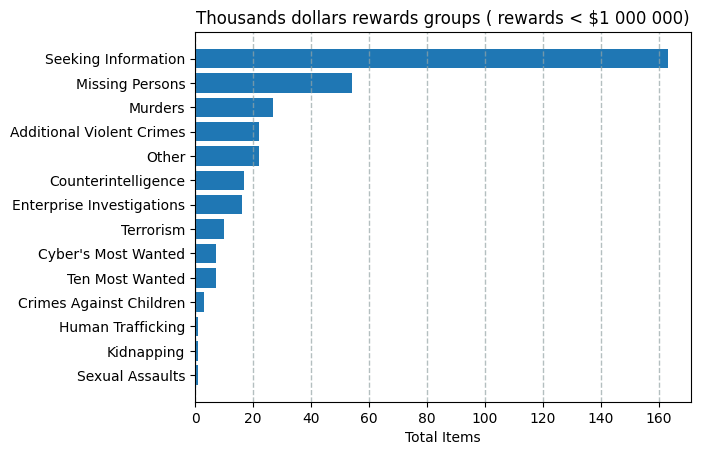

In [197]:
#create plot
fig, ax = plt.subplots()

#prepare data
data = fbi_wanted_df.loc[fbi_wanted_df["reward"] < 1000000].groupby("subject_group").count()["title"].sort_values(ascending=False)

x = [str(i) for i in data.index]
y = data.values

#create horizontal barchart
ax.barh(x, y)
ax.invert_yaxis()
plt.title("Thousands dollars rewards groups ( rewards < $1 000 000)")
plt.xlabel('Total Items')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='x', alpha=0.7)
plt.show()